In [36]:
import pandas as pd
import numpy as np
import yfinance as yf

##### SPY DATA

In [34]:
ticker_data = yf.download('SPY', start = '2020-01-01', end='2025-01-01', auto_adjust= False)
SPY_data = pd.DataFrame(ticker_data)
SPY_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2020-01-02,299.406372,324.869995,324.890015,322.529999,323.540009,59151200
2020-01-03,297.139252,322.410004,323.640015,321.100006,321.160004,77709700
2020-01-06,298.272980,323.640015,323.730011,320.359985,320.489990,55653900
2020-01-07,297.434143,322.730011,323.540009,322.239990,323.019989,40496400
2020-01-08,299.019379,324.450012,325.779999,322.670013,322.940002,68296000


cleaning and converting to a csv 

In [35]:
if isinstance(SPY_data.columns, pd.MultiIndex):
    SPY_data.columns = SPY_data.columns.get_level_values(0)
SPY_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,299.406372,324.869995,324.890015,322.529999,323.540009,59151200
2020-01-03,297.139252,322.410004,323.640015,321.100006,321.160004,77709700
2020-01-06,298.272980,323.640015,323.730011,320.359985,320.489990,55653900
2020-01-07,297.434143,322.730011,323.540009,322.239990,323.019989,40496400
2020-01-08,299.019379,324.450012,325.779999,322.670013,322.940002,68296000


we need to log returns of the Adjusted close price to feed in SV models. Adj close includes dividends/splits

In [38]:
SPY_data['Log_Returns'] = np.log(SPY_data['Adj Close']).diff().dropna()
SPY_data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Log_Returns
Date,,,,,,,
2020-01-02,299.406372,324.869995,324.890015,322.529999,323.540009,59151200,NaN
2020-01-03,297.139252,322.410004,323.640015,321.100006,321.160004,77709700,-0.007601
2020-01-06,298.272980,323.640015,323.730011,320.359985,320.489990,55653900,0.003808
2020-01-07,297.434143,322.730011,323.540009,322.239990,323.019989,40496400,-0.002816
2020-01-08,299.019379,324.450012,325.779999,322.670013,322.940002,68296000,0.005316


Converting to CSV

In [40]:
SPY_data.to_csv("SPY_data.csv", index= False)

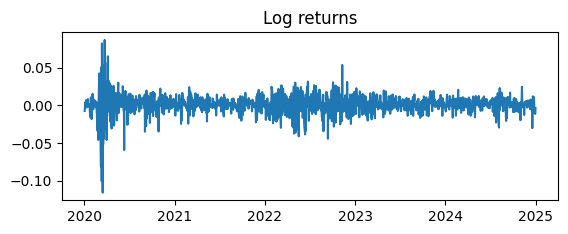

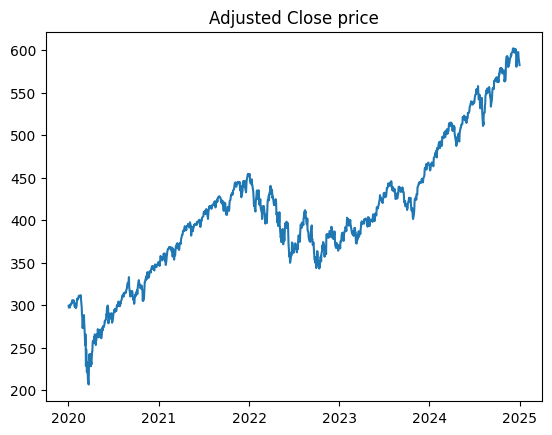

In [55]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(SPY_data['Log_Returns'])
plt.title("Log returns")
plt.show()
plt.plot(SPY_data['Adj Close'])
plt.title('Adjusted Close price')
plt.show()